# EDA and Cleaning

## Task: 

Create categorical groups of Property Manager users and discover what is causing churn in relation to the data generated. The inital hypothesis is the following: **Are property managers more likely to leave TenantCloud depending on number of connected tenants?** Find the correlation between number of conected tenants and property manager activity. 


## Data Set: 

## Patterns Identified: 

## Hypothesis Developed: 

## Hypothesis Testing: 

## Outcomes: assess relationships between data:

## Sources of Error (Quality of Data): 
Describe quality issues. 

## Questions:


## Discovered Insights: 

### EDA Conclusions: 

Found a positive relationship between x and y. 

Property Mangers with one conected tenanat are twice as likely to. 

## Data Modeling Proposal


# Initial Exploration 

In [1]:
# Import Dependencies
import scipy
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

TypeError: 'NoneType' object is not iterable

In [60]:
# Read csv as pandas
file = "UserPersonas.csv"

# Read csv file and drop blank rows 
file_df = pd.read_csv(file, encoding ="ISO-8859-1", skip_blank_lines=True).dropna(how='all')

In [61]:
file_df.shape

(19816, 20)

In [62]:
file_df.head()

,PM_User_id,role,city,state,zip,country,company,age_range,TN_Conn,TN_NotConn,OW_Conn,OW_NotConn,propertycount,pmtsent,pmtsrecd,feedbackcount,workordercount,stripe_plan,viewDate,created_at
1,1.0,admin,Krykhivtsi,Ivano-Frankivs'ka oblast,76493,UA,Ukietech,NaN,4.0,14.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,plan_2,8/22/2018 6:11,4/3/2012 3:54
3,8.0,admin,Whitby,ON,L1N 1C4,CA,Property Blox,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1/1/2000 0:00,NaN,3/17/2015 8:55,3/20/2013 10:34
5,13.0,admin,Chicago,IL,60622,US,Evans Property,NaN,18.0,13.0,3.0,6.0,10.0,NaN,3.0,17.0,6/1/2000 0:00,plan_2_annual,10/9/2018 9:35,3/26/2013 8:07
7,17.0,admin,Van Nuys,CA,91406,US,AOA,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,12/12/2013 18:13,5/17/2013 15:41
9,28.0,admin,NaN,NaN,NaN,US,castle enterprise,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,12/3/2013 11:11,6/12/2013 12:00


In [63]:
# Count not nulls
file_df.count()

PM_User_id        19816
role              19816
city              10864
state             10836
zip               10590
country           15045
company            9792
age_range          6107
TN_Conn            5362
TN_NotConn        16904
OW_Conn             861
OW_NotConn         7713
propertycount     19816
pmtsent            2167
pmtsrecd           2945
feedbackcount      3878
workordercount     5079
stripe_plan        3057
viewDate          17170
created_at        19816
dtype: int64

In [64]:
# Find the data types of each column 
file_df.dtypes

PM_User_id        float64
role               object
city               object
state              object
zip                object
country            object
company            object
age_range         float64
TN_Conn           float64
TN_NotConn        float64
OW_Conn           float64
OW_NotConn        float64
propertycount     float64
pmtsent           float64
pmtsrecd          float64
feedbackcount     float64
workordercount     object
stripe_plan        object
viewDate           object
created_at         object
dtype: object

In [65]:
# Create list of columns
columns = file_df.columns.tolist()
columns

['PM_User_id',
 'role',
 'city',
 'state',
 'zip',
 'country',
 'company',
 'age_range',
 'TN_Conn',
 'TN_NotConn',
 'OW_Conn',
 'OW_NotConn',
 'propertycount',
 'pmtsent',
 'pmtsrecd',
 'feedbackcount',
 'workordercount',
 'stripe_plan',
 'viewDate',
 'created_at']

In [66]:
# Quick statistical overview 
file_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM_User_id,19816.0,43109.349717,30632.699444,1.0,16886.0,37176.5,65985.0,110426.0
age_range,6107.0,3.896021,1.233935,1.0,3.0,4.0,5.0,7.0
TN_Conn,5362.0,5.360127,11.818701,1.0,1.0,2.0,5.0,217.0
TN_NotConn,16904.0,8.149314,21.868061,1.0,1.0,2.0,7.0,797.0
OW_Conn,861.0,1.908246,2.686692,1.0,1.0,1.0,2.0,29.0
OW_NotConn,7713.0,2.192791,6.235526,1.0,1.0,1.0,2.0,368.0
propertycount,19816.0,3.956803,8.686461,1.0,1.0,1.0,3.0,294.0
pmtsent,2167.0,3.336410,9.582748,1.0,1.0,1.0,2.0,229.0
pmtsrecd,2945.0,33.251613,78.538974,1.0,1.0,6.0,28.0,995.0
feedbackcount,3878.0,6.527592,17.268537,1.0,1.0,3.0,6.0,682.0


In [67]:
clean_df = file_df

In [68]:
# Extract year, month, day, day_of_week on the last view date 
clean_df['viewDate'] = pd.to_datetime(clean_df['viewDate']) 
clean_df['year'] = clean_df['viewDate'].dt.year
clean_df['month'] = clean_df['viewDate'].dt.month
clean_df['day'] = clean_df['viewDate'].dt.day
clean_df['day_of_week'] = clean_df['viewDate'].dt.weekday_name
clean_df['hour'] = clean_df['viewDate'].dt.hour

# Extract year, month, day, day_of_week on the created_at
clean_df['created_at'] = pd.to_datetime(clean_df['created_at']) 
clean_df['year_created'] = clean_df['created_at'].dt.year
clean_df['month_created'] = clean_df['created_at'].dt.month
clean_df['day_created'] = clean_df['created_at'].dt.day
clean_df['day_of_week_created'] = clean_df['created_at'].dt.weekday_name
clean_df['hour_created'] = clean_df['created_at'].dt.hour

# Duration of Membership
clean_df['duration'] = pd.to_datetime(clean_df['viewDate']) -  pd.to_datetime(clean_df['created_at']) 
clean_df.head()

,PM_User_id,role,city,state,zip,country,company,age_range,TN_Conn,TN_NotConn,...,month,day,day_of_week,hour,year_created,month_created,day_created,day_of_week_created,hour_created,duration
1,1.0,admin,Krykhivtsi,Ivano-Frankivs'ka oblast,76493,UA,Ukietech,NaN,4.0,14.0,...,8.0,22.0,Wednesday,6.0,2012,4,3,Tuesday,3,2332 days 02:17:00
3,8.0,admin,Whitby,ON,L1N 1C4,CA,Property Blox,NaN,1.0,NaN,...,3.0,17.0,Tuesday,8.0,2013,3,20,Wednesday,10,726 days 22:21:00
5,13.0,admin,Chicago,IL,60622,US,Evans Property,NaN,18.0,13.0,...,10.0,9.0,Tuesday,9.0,2013,3,26,Tuesday,8,2023 days 01:28:00
7,17.0,admin,Van Nuys,CA,91406,US,AOA,NaN,1.0,NaN,...,12.0,12.0,Thursday,18.0,2013,5,17,Friday,15,209 days 02:32:00
9,28.0,admin,NaN,NaN,NaN,US,castle enterprise,NaN,1.0,NaN,...,12.0,3.0,Tuesday,11.0,2013,6,12,Wednesday,12,173 days 23:11:00


# Data Clean up 

In [69]:
# # Take the columns we need
# clean_df = clean_df[['PM_User_id','role','city','state','zip','country','company','TN_Conn','TN_NotConn','OW_Conn','OW_NotConn','propertycount','pmtsent','pmtsrecd','feedbackcount','workordercount','stripe_plan','viewDate','created_at']]
# clean_df[['TN_Conn',
#  'TN_NotConn',
#  'OW_Conn',
#  'OW_NotConn',
#  'propertycount',
#  'pmtsent',
#  'pmtsrecd',
#  'feedbackcount',
#  'workordercount']] = clean_df[['TN_Conn',
#  'TN_NotConn',
#  'OW_Conn',
#  'OW_NotConn',
#  'propertycount',
#  'pmtsent',
#  'pmtsrecd',
#  'feedbackcount',
#  'workordercount']].fillna(0)

clean_df.stripe_plan = clean_df.stripe_plan.fillna('unspecified_plan')
clean_df.head()

,PM_User_id,role,city,state,zip,country,company,age_range,TN_Conn,TN_NotConn,...,month,day,day_of_week,hour,year_created,month_created,day_created,day_of_week_created,hour_created,duration
1,1.0,admin,Krykhivtsi,Ivano-Frankivs'ka oblast,76493,UA,Ukietech,NaN,4.0,14.0,...,8.0,22.0,Wednesday,6.0,2012,4,3,Tuesday,3,2332 days 02:17:00
3,8.0,admin,Whitby,ON,L1N 1C4,CA,Property Blox,NaN,1.0,NaN,...,3.0,17.0,Tuesday,8.0,2013,3,20,Wednesday,10,726 days 22:21:00
5,13.0,admin,Chicago,IL,60622,US,Evans Property,NaN,18.0,13.0,...,10.0,9.0,Tuesday,9.0,2013,3,26,Tuesday,8,2023 days 01:28:00
7,17.0,admin,Van Nuys,CA,91406,US,AOA,NaN,1.0,NaN,...,12.0,12.0,Thursday,18.0,2013,5,17,Friday,15,209 days 02:32:00
9,28.0,admin,NaN,NaN,NaN,US,castle enterprise,NaN,1.0,NaN,...,12.0,3.0,Tuesday,11.0,2013,6,12,Wednesday,12,173 days 23:11:00


In [110]:
# Property Count 
# Subscription 
# Zero Connected Tenants
#file_df.sort_values(by='propertycount', ascending=False).head(5)
# Tenants Connected
#file_df.sort_values(by='TN_Conn', ascending=False)
# Tenants Not Connected

data = file_df.sort_values(by='TN_NotConn', ascending=False).sort_values(by="stripe_plan")
print(data)
# Owners Connected
#file_df.sort_values(by='OW_Conn', ascending=False).head(5)
# Owners not connected
#file_df.sort_values(by='OW_NotConn', ascending=False).head(5)
# Payment Sent 
#file_df.sort_values(by='pmtsent', ascending=False).head(5)
# Payment Received
#file_df.sort_values(by='pmtsrecd', ascending=False).head(5)
# Feedback Count
#file_df.sort_values(by='feedbackcount', ascending=False).head(5)
# Workordercount
#file_df.sort_values(by='workordercount', ascending=False).head(5)
# Workordercount
#file_df.sort_values(by='workordercount', ascending=False).head(5)

       PM_User_id   role                city           state      zip country  \
27183     57584.0  admin            Mitchell              SD    57301      US   
9085      15424.0  admin       San Francisco              CA    94112      US   
22155     44172.0  admin             Miramar              FL    33027      US   
3313       5573.0  admin           La Crosse              WI    54601      US   
11153     18881.0  admin      Saint-Colomban              FL    33897      US   
39453    109564.0  admin            Matthews  North Carolina    28105      US   
14465     24967.0  admin  Jacksonville Beach              FL    32250      US   
35653     90713.0  admin             Vallejo              CA    94591      US   
21891     43387.0  admin        Severna Park              MD    21146      US   
22103     43977.0  admin                 NaN             NaN      NaN      US   
22571     45078.0  admin          Wilmington              NC    28409      US   
4173       7061.0  admin    

In [189]:
clean_df[['propertycount']] = clean_df[['propertycount']].fillna(0)
countries = ["GB", "US", "AU"]

nc = clean_df.loc[(clean_df["stripe_plan"] != "unspecified") & (clean_df["stripe_plan"] != "plan_0") & (clean_df["TN_Conn"] <= 0) & (clean_df["country"] == "US" ) & (clean_df["country"] == "GB") |(clean_df["country"] == "AU") & (clean_df["propertycount"] >= 1),:  ]

nc
                                 
# subscription = Yes
# 0 connected tenants
# gb, au, us
#1 property

,PM_User_id,role,city,state,zip,country,company,age_range,TN_Conn,TN_NotConn,...,hour,year_created,month_created,day_created,day_of_week_created,hour_created,duration,property_persona,connected_persona,not_connected_persona
303,603.0,admin,Northbridge,Western Australia,6003,AU,NaN,NaN,NaN,2.0,...,23.0,2014,4,28,Monday,4,-1 days +19:37:00,0-5,NaN,0-5
327,653.0,admin,Chatswood,New South Wales,2067,AU,IMTDev,NaN,NaN,2.0,...,13.0,2014,5,11,Sunday,5,58 days 07:55:00,0-5,NaN,0-5
529,963.0,admin,Magill North,SA,5072,AU,RAcovery Property Management,NaN,NaN,1.0,...,13.0,2014,9,14,Sunday,0,122 days 12:42:00,0-5,NaN,0-5
611,1062.0,admin,Nimbin,New South Wales,2480,AU,NaN,NaN,NaN,2.0,...,19.0,2014,11,25,Tuesday,23,8 days 19:11:00,0-5,NaN,0-5
693,1159.0,admin,Lesmurdie,Western Australia,6076,AU,NaN,NaN,1.0,NaN,...,11.0,2015,2,1,Sunday,12,826 days 23:27:00,0-5,0-5,NaN
941,1809.0,admin,Bundall,QLD,4217,AU,Crystal Clear Cleaning Services,NaN,1.0,3.0,...,22.0,2015,4,19,Sunday,10,33 days 11:51:00,0-5,0-5,0-5
975,1861.0,admin,Semaphore,South Australia,5019,AU,Aussie Cider pty ltd,NaN,NaN,1.0,...,4.0,2015,4,26,Sunday,13,7 days 14:52:00,0-5,NaN,0-5
1047,2032.0,admin,"Wollongong, New South Wales, Australia",NaN,NaN,AU,NaN,NaN,NaN,1.0,...,10.0,2015,5,7,Thursday,14,1047 days 20:12:00,0-5,NaN,0-5
1067,2072.0,admin,HUNTINGDALE,Victoria,3166,AU,Melbourne CBD Accommodation,NaN,NaN,1.0,...,23.0,2015,5,12,Tuesday,11,721 days 12:02:00,0-5,NaN,0-5
1111,2135.0,admin,Orange,New South Wales,2800,AU,NaN,NaN,NaN,1.0,...,2.0,2015,5,20,Wednesday,9,7 days 16:43:00,0-5,NaN,0-5


In [105]:
groupped_stripe_plan = clean_df.groupby('stripe_plan')

In [72]:
# Count groupped by stripped plan 
groupped_stripe_plan['TN_Conn', 'TN_NotConn', 'propertycount','pmtsent','pmtsrecd','feedbackcount','workordercount'].count()


,TN_Conn,TN_NotConn,propertycount,pmtsent,pmtsrecd,feedbackcount,workordercount
stripe_plan,,,,,,,
plan_0,346,459,583,121,216,301,200
plan_1,78,102,108,88,97,88,74
plan_1_annual,30,41,42,7,17,32,25
plan_2,14,14,15,10,11,11,12
plan_2_annual,10,10,12,0,2,6,9
plan_3,1161,1074,1368,1239,1319,896,797
plan_3_annual,781,731,929,349,715,621,519
unspecified_plan,2942,14473,16759,353,568,1923,3443


In [73]:
# Average by stripped plan 
# Not all categories Property Managers have a stripe_plan 
groupped_stripe_plan['TN_Conn', 'TN_NotConn', 'propertycount','pmtsent','pmtsrecd','feedbackcount','workordercount'].mean()

,TN_Conn,TN_NotConn,propertycount,pmtsent,pmtsrecd,feedbackcount
stripe_plan,,,,,,
plan_0,3.921965,15.599129,5.204117,3.900826,14.171296,5.358804
plan_1,25.500000,71.656863,29.435185,6.340909,65.103093,12.397727
plan_1_annual,30.766667,80.853659,42.904762,27.714286,199.411765,17.125000
plan_2,37.214286,18.571429,16.600000,15.100000,105.727273,7.909091
plan_2_annual,7.300000,129.700000,28.916667,NaN,3.500000,8.000000
plan_3,9.083549,13.719739,6.396199,2.807910,38.852919,9.698661
plan_3_annual,9.003841,13.562244,6.587729,4.157593,40.566434,10.652174
unspecified_plan,2.141400,6.478684,3.277463,2.620397,6.580986,3.443578


In [74]:
# Average of connected tenants for PMs who have a stripe_plan  
clean_df.groupby('stripe_plan').TN_Conn.mean()

stripe_plan
plan_0               3.921965
plan_1              25.500000
plan_1_annual       30.766667
plan_2              37.214286
plan_2_annual        7.300000
plan_3               9.083549
plan_3_annual        9.003841
unspecified_plan     2.141400
Name: TN_Conn, dtype: float64

In [75]:
np.mean(clean_df.groupby('stripe_plan').TN_Conn.mean())

15.616463500111825

In [76]:
# Average of connected tenants for PM's who have and do not have a strip_plan 
np.mean(file_df.TN_Conn.mean())

5.360126818351361

In [77]:
# Average of connected tenants for PM's who do not have a stripe_plan  
file_df.TN_Conn.mean()

5.360126818351361

## Profiling of a PM

### By property count

In [78]:
# # Calculate basic stats
properties_count = clean_df['propertycount'].count()
properties_total = clean_df['propertycount'].sum()
properties_max = clean_df['propertycount'].max()
properties_min = clean_df['propertycount'].min()
properties_mean = clean_df['propertycount'].mean()
properties_median = clean_df['propertycount'].median()
properties_mode = clean_df['propertycount'].mode()
properties_std = clean_df['propertycount'].std()

# Create Summary Table
print(f"Total of PM's with properties are {int(properties_count)}.")
print(f"All of the property managers combined hold a total of {int(properties_total)} properties.")
print(f"The highest number of properties a PM holds is {int(properties_max)}.")
print(f"The lowest number of properties a PM holds is {int(properties_min)}.")
print(f"The average number of properties all PM holds is {(properties_mean)}.")
print(f"The standard deviation or spread from the average is {properties_std}.")
print(f"The median number of properties all PM holds is {int(properties_median)}.")
print(f"The most popular number of properties all PMs hold is {int(properties_mode)}.")


# Establish bins for properties
property_bins = [0,5,10,20,50,100,200,300,400]

# Name bins
property_persona = ["0-5", "6-10", "11-20","21-50","51-100","101-200", "200-300", "301+"]

# Segment and sort property counts into bins 
clean_df["property_persona"] =  pd.cut(clean_df["propertycount"],bins=property_bins, labels=property_persona)

# Create new data frame with added "Ownership Category" and group it
persona_property_groupped = clean_df.groupby("property_persona")

# Count total property managers by each persona category 
total_count_by_persona_p = persona_property_groupped["PM_User_id"].nunique()

# Calculate percentages by persona category 
percentage_by_persona_p =  (total_count_by_persona_p/properties_count) * 100

# Create data frame of personas
persona_p_breakdown = pd.DataFrame({"Percentage of PM's": percentage_by_persona_p, "Total Count": total_count_by_persona_p})
persona_p_breakdown.style.format({"Percentage of PM's":"{:,.2f}%"})


#clean_df['propertycount'].plot.hist(alpha=0.5, bins=property_bins)
                                 
#persona_p_breakdown

Total of PM's with properties are 19816.
All of the property managers combined hold a total of 78408 properties.
The highest number of properties a PM holds is 294.
The lowest number of properties a PM holds is 1.
The average number of properties all PM holds is 3.95680258377069.
The standard deviation or spread from the average is 8.686461089446576.
The median number of properties all PM holds is 1.
The most popular number of properties all PMs hold is 1.


,Percentage of PM's,Total Count
property_persona,,
0-5,84.17%,16679
6-10,8.33%,1650
11-20,4.68%,928
21-50,2.23%,441
51-100,0.49%,97
101-200,0.09%,18
200-300,0.02%,3
301+,0.00%,0


### By TN_Conn

Number of property managers with connected tenants 5362.
All of the property managers combined have a total of 28741 tenants.
The highest number of tenants a PM has is 217.
The lowest number of tenants a PM has is 1.
The average number of tenants all PMs have is 5.360126818351361.
The standard deviation or spread from the average is 11.818701293446136.
The median number of tenants all PMs have is 2.
The most popular number of tenants all PMs have is 1.


,Percentage of PM's with Tenants,Count with Tenants
connected_persona,,
0-5,78.571429,4213
6-10,9.623275,516
11-20,6.844461,367
21-30,2.331220,125
31-50,1.342783,72
51-100,1.007087,54
101-150,0.205147,11
151-200,0.055949,3
201+,0.018650,1


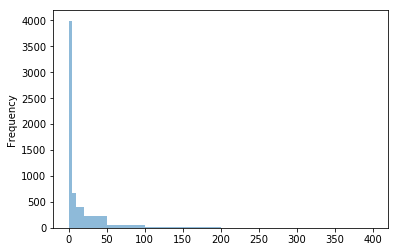

In [85]:
c_count = clean_df['TN_Conn'].count()
c_total = clean_df['TN_Conn'].sum()
c_max = clean_df['TN_Conn'].max()
c_min = clean_df['TN_Conn'].min()
c_mean = clean_df['TN_Conn'].mean()
c_median = clean_df['TN_Conn'].median()
c_mode = clean_df['TN_Conn'].mode()
c_std = clean_df['TN_Conn'].std()

print(f"Number of property managers with connected tenants {int(c_count)}.")
print(f"All of the property managers combined have a total of {int(c_total)} tenants.")
print(f"The highest number of tenants a PM has is {int(c_max)}.")
print(f"The lowest number of tenants a PM has is {int(c_min)}.")
print(f"The average number of tenants all PMs have is {(c_mean)}.")
print(f"The standard deviation or spread from the average is {c_std}.")
print(f"The median number of tenants all PMs have is {int(c_median)}.")
print(f"The most popular number of tenants all PMs have is {int(c_mode)}.")


# Establish bins for connected tenants
c_bins = [0,5,10,20,30,50,100,150,200,300]

# Name connected persona bins
c_persona = ["0-5", "6-10", "11-20","21-30","31-50","51-100", "101-150", "151-200", "201+"]

# Segment and sort connected persona counts into bins 
clean_df["connected_persona"] = pd.cut(clean_df["TN_Conn"],bins=c_bins, labels=c_persona)

# Create new data frame with added "Ownership Category" and group it
persona_c_groupped = clean_df.groupby("connected_persona")

# Count total property managers by each persona category 
total_count_by_persona_c = persona_c_groupped["PM_User_id"].nunique()

# Calculate percentages by persona category 
percentage_by_persona_c =  (total_count_by_persona_c/c_count) * 100

# Create data frame of personas
persona_c_breakdown = pd.DataFrame({"Percentage of PM's with Tenants": percentage_by_persona_c, "Count with Tenants": total_count_by_persona_c})
persona_c_breakdown.style.format({"Percentage of PM's with Tenants":"{:,.2f}%"})


clean_df['TN_Conn'].plot.hist(alpha=0.5, bins=property_bins)
                                 
persona_c_breakdown






By TN_NotConn

All of the property managers combined have a total of 137756 not connected tenants.
The highest number of not connected tenants a PM has is 797.
The lowest number of not connected tenants a PM has is 1.
The average number of not connected tenants all PMs have is 8.14931377188831.
The standard deviation or spread from the average is 21.868061192971428.
The median number of not connected tenants all PMs have is 2.
The most popular number of not connected tenants all PMs have is 1.


,Percentage of PM's with Not Connected Tenants,Count with Not Connected Tenants
0-5,78.571429,12111
6-10,9.623275,1884
11-20,6.844461,1395
21-30,2.331220,589
31-50,1.342783,458
51-100,1.007087,347
101-150,0.205147,61
151-200,0.055949,32
201+,0.018650,15


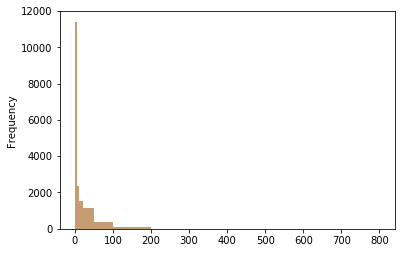

In [91]:
nc_count = clean_df['TN_Conn'].count()
n_cn_total = clean_df['TN_NotConn'].sum()
n_cn_max = clean_df['TN_NotConn'].max()
n_cn_min = clean_df['TN_NotConn'].min()
n_cn_mean = clean_df['TN_NotConn'].mean()
n_cn_median = clean_df['TN_NotConn'].median()
n_cn_mode = clean_df['TN_NotConn'].mode()
n_cn_std = clean_df['TN_NotConn'].std()

print(f"All of the property managers combined have a total of {int(n_cn_total)} not connected tenants.")
print(f"The highest number of not connected tenants a PM has is {int(n_cn_max)}.")
print(f"The lowest number of not connected tenants a PM has is {int(n_cn_min)}.")
print(f"The average number of not connected tenants all PMs have is {(n_cn_mean)}.")
print(f"The standard deviation or spread from the average is {n_cn_std}.")
print(f"The median number of not connected tenants all PMs have is {int(n_cn_median)}.")
print(f"The most popular number of not connected tenants all PMs have is {int(n_cn_mode)}.")


bins = [1,5,10,20,50,100,200,300,400,500,600,700,800]
clean_df['TN_NotConn'].plot.hist(alpha=0.5, bins=bins)




# Establish bins for connected tenants
nc_bins = [0,5,10,20,30,50,100,150,200,300]

# Name connected persona bins
nc_persona = ["0-5", "6-10", "11-20","21-30","31-50","51-100", "101-150", "151-200", "201+"]

# Segment and sort connected persona counts into bins 
clean_df["not_connected_persona"] = pd.cut(clean_df["TN_NotConn"],bins=c_bins, labels=c_persona)

# Create new data frame with added "Ownership Category" and group it
persona_nc_groupped = clean_df.groupby("not_connected_persona")

# Count total property managers by each persona category 
total_count_by_persona_nc = persona_nc_groupped["PM_User_id"].nunique()

# Calculate percentages by persona category 
percentage_by_persona_nc =  (total_count_by_persona_c/nc_count) * 100

# Create data frame of personas
persona_nc_breakdown = pd.DataFrame({"Percentage of PM's with Not Connected Tenants": percentage_by_persona_nc, "Count with Not Connected Tenants": total_count_by_persona_nc})
persona_nc_breakdown.style.format({"Percentage of PM's with Tenants":"{:,.2f}%"})


clean_df['TN_NotConn'].plot.hist(alpha=0.5, bins=property_bins)
                                 
persona_nc_breakdown



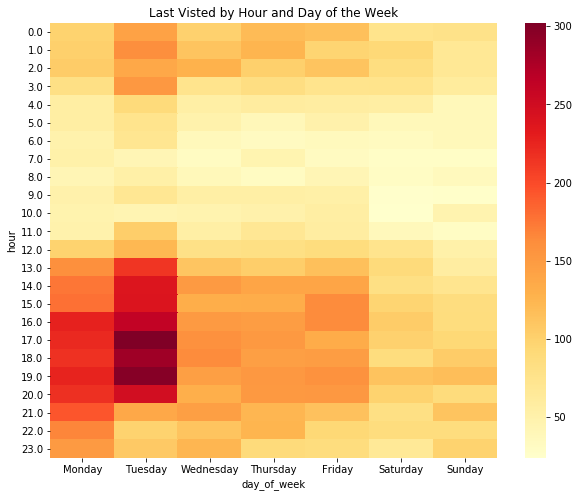

In [90]:
# Create an array of the days of the week 
days_arr = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Create function that returns the correct day of the week 
def get_day_of_week(x):
    return days_arr[x.weekday()]

# Use seaborn to create heat map 
df_heat = clean_df.groupby(["hour", "day_of_week"])["PM_User_id"].size().reset_index()
df_heat2 = df_heat.pivot("hour", "day_of_week", "PM_User_id")
fig, ax = plt.subplots(figsize=(10,8))       
sns.heatmap(df_heat2[days_arr] , cmap="YlOrRd")
plt.title("Last Visted by Hour and Day of the Week")

# Save heatmap image
plt.show()

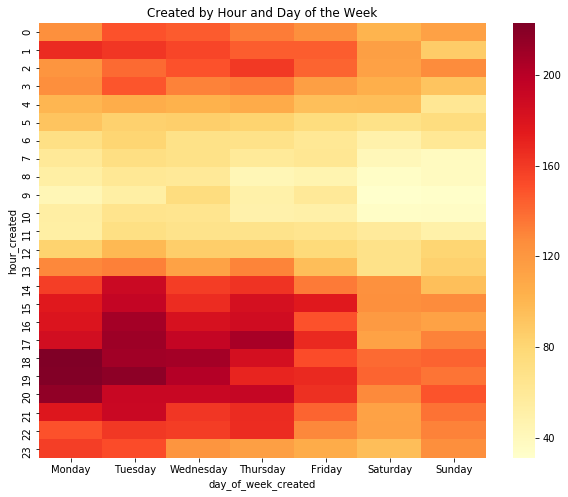

In [92]:
# Create an array of the days of the week 
days_arr = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Create function that returns the correct day of the week 
def get_day_of_week(x):
    return days_arr[x.weekday()]

# Use seaborn to create heat map 
df_heat = clean_df.groupby(["hour_created", "day_of_week_created"])["PM_User_id"].size().reset_index()
df_heat2 = df_heat.pivot("hour_created", "day_of_week_created", "PM_User_id")
fig, ax = plt.subplots(figsize=(10,8))       
sns.heatmap(df_heat2[days_arr] , cmap="YlOrRd")
plt.title("Created by Hour and Day of the Week")

# Save heatmap image
plt.show()

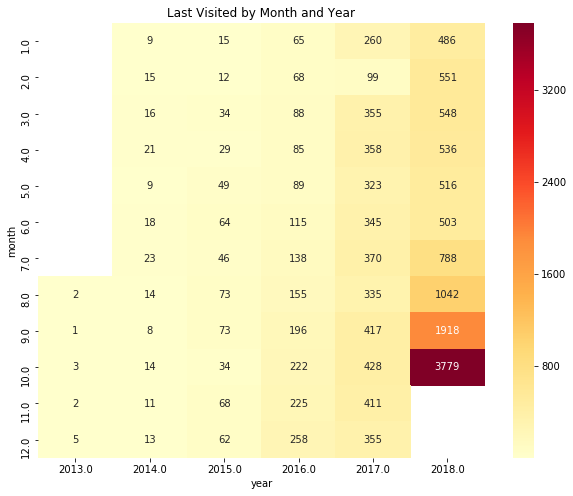

In [93]:
# Use seaborn to create heat map 
df_heat= clean_df.groupby(["year", "month"])["PM_User_id"].size().reset_index()
df_heat2 = df_heat.pivot("month", "year", "PM_User_id")
fig, ax = plt.subplots(figsize=(10,8))       
sns.heatmap(df_heat2, cmap="YlOrRd", annot=True, fmt='g')
plt.title("Last Visited by Month and Year")


plt.show()

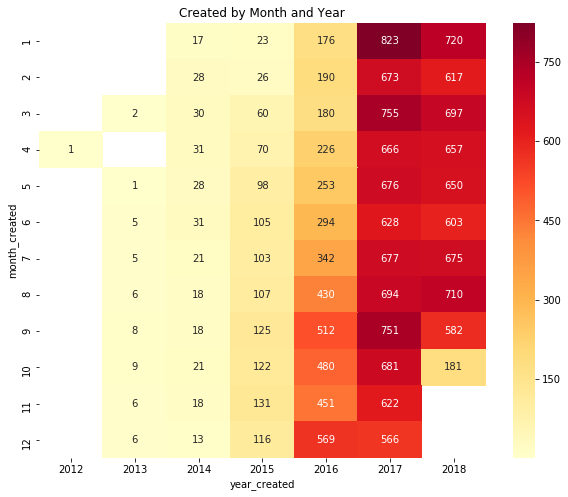

In [94]:
# Use seaborn to create heat map 
df_heat= clean_df.groupby(["year_created", "month_created"])["PM_User_id"].size().reset_index()
df_heat2 = df_heat.pivot("month_created", "year_created", "PM_User_id")
fig, ax = plt.subplots(figsize=(10,8))       
sns.heatmap(df_heat2, cmap="YlOrRd", annot=True, fmt='g')
plt.title("Created by Month and Year")


plt.show()

In [ ]:
us_df = clean_df.loc[clean_df["country"] == "US", :]

In [ ]:
us_df.count()

In [ ]:
texas_df = clean_df.loc[clean_df["state"] == "TX", :]


In [ ]:
texas_df.sort_values(by='TN_Conn', ascending=False)

In [ ]:
texas_df.sort_values(by='TN_Conn', ascending=False)

Outcome, Dependent Variable, Response: 
    Answer yes or no questions. 